in week-4 we are going to Specify ```Data Sources``` and ```Data Pre-processing``` in our project. 

## Analyzing the World Happiness Data


### Preparing the data for analysis

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

Create a Pandas dataframe named ```dfraw``` by reading in the data in the worksheet named "Table2.1" from the spreadsheet "World_Health_Report_Data_2018.xls".

In [283]:
dfraw = pd.read_excel("World_Health_Report_Data_2018.xls", sheet_name='Table2.1' )
dfraw

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.72,7.17,0.45,49.21,0.72,0.18,0.88,0.52,0.26,0.61,-1.93,-1.66,1.77,0.48,NaN,NaN,NaN
1,Afghanistan,2009,4.40,7.33,0.55,49.62,0.68,0.20,0.85,0.58,0.24,0.61,-2.04,-1.64,1.72,0.39,NaN,NaN,0.44
2,Afghanistan,2010,4.76,7.39,0.54,50.01,0.60,0.14,0.71,0.62,0.28,0.30,-1.99,-1.62,1.88,0.39,NaN,NaN,0.33
3,Afghanistan,2011,3.83,7.42,0.52,50.37,0.50,0.18,0.73,0.61,0.27,0.31,-1.92,-1.62,1.79,0.47,NaN,NaN,0.34
4,Afghanistan,2012,3.78,7.52,0.52,50.71,0.53,0.25,0.78,0.71,0.27,0.44,-1.84,-1.40,1.80,0.48,NaN,NaN,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,Zimbabwe,2013,4.69,7.57,0.80,48.95,0.58,-0.08,0.83,0.71,0.18,0.53,-1.03,-1.53,1.96,0.42,NaN,0.43,0.56
1558,Zimbabwe,2014,4.18,7.56,0.77,50.05,0.64,-0.05,0.82,0.73,0.24,0.57,-0.99,-1.48,2.08,0.50,NaN,0.43,0.60
1559,Zimbabwe,2015,3.70,7.56,0.74,50.93,0.67,-0.09,0.81,0.72,0.18,0.59,-0.89,-1.36,2.20,0.59,NaN,0.43,0.66
1560,Zimbabwe,2016,3.74,7.54,0.77,51.80,0.73,-0.07,0.72,0.74,0.21,0.70,-0.86,-1.37,2.78,0.74,NaN,0.43,0.60


After going over the dataset, we found out not all the columns are interesting to do our analysis. In the code cell below, the variable cols_to_include contains a list of column names to extract. Execute the cell.

In [284]:
cols_to_include = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']


### creating a new dataframe named `df` that includes the subset of data in `cols_to_include`.

In [285]:
df = dfraw[cols_to_include]

Take a look at the head of the new dataframe

In [286]:
df.head()

,country,year,Life Ladder,Positive affect,Negative affect,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,3.72,0.52,0.26,7.17,0.45,49.21,0.72,0.18,0.88
1,Afghanistan,2009,4.40,0.58,0.24,7.33,0.55,49.62,0.68,0.20,0.85
2,Afghanistan,2010,4.76,0.62,0.28,7.39,0.54,50.01,0.60,0.14,0.71
3,Afghanistan,2011,3.83,0.61,0.27,7.42,0.52,50.37,0.50,0.18,0.73
4,Afghanistan,2012,3.78,0.71,0.27,7.52,0.52,50.71,0.53,0.25,0.78


to have a better understanding of the data we use ```describe()``` method. The ```describe``` method on a dataframe provides a useful statistical summary of the data. But we don't need some unimportant data such as standard deviation of year and also, to be more informative we make the result transpose.

In [287]:
df2 = df.describe().T
df2.drop(labels='year', axis=0, inplace = True)
df2

,count,mean,std,min,25%,50%,75%,max
Life Ladder,1562.00,5.43,1.12,2.66,4.61,5.33,6.27,8.02
Positive affect,1544.00,0.71,0.11,0.36,0.62,0.72,0.80,0.94
Negative affect,1550.00,0.26,0.08,0.08,0.20,0.25,0.31,0.70
Log GDP per capita,1535.00,9.22,1.18,6.38,8.31,9.40,10.19,11.77
Social support,1549.00,0.81,0.12,0.29,0.75,0.83,0.90,0.99
Healthy life expectancy at birth,1553.00,62.25,7.96,37.77,57.30,63.80,68.10,76.54
Freedom to make life choices,1533.00,0.73,0.15,0.26,0.63,0.75,0.84,0.99
Generosity,1482.00,0.00,0.16,-0.32,-0.11,-0.02,0.09,0.68
Perceptions of corruption,1472.00,0.75,0.19,0.04,0.70,0.81,0.88,0.98


So, based on the observations, We write a function, that applies describe() method on it and doea some renaming on the result of describe() method columns, shows it in transpose style and drops some unimportant columns of it. later on we can use the output for the further analysis.

In [288]:
def produce_summary_table(df):
#     step 4:
    column_renaming = {'count': 'N', 'mean': 'Mean', 'std': 'Std. Dev.', 'min': 'Min.', 'max': 'Max.'}
    column_order = ['Mean', 'Std. Dev.', 'Min.', 'Max.', 'N']
    df2= df.describe().T
    df2.drop(index=['year'], inplace=True)
    df2.drop(columns=['25%', '50%', '75%'], inplace= True)
    df3 = df2.rename(column_renaming, axis=1)
    dfsummary = df3[['Mean', 'Std. Dev.', 'Min.', 'Max.', 'N']]
    dfsummary
#     step 5
    dfsummary['N'] = dfsummary['N'].astype(int)
    dfsummary
    
    return dfsummary

In [289]:
summary = produce_summary_table(dfraw)
summary

,Mean,Std. Dev.,Min.,Max.,N
Life Ladder,5.43,1.12,2.66,8.02,1562
Log GDP per capita,9.22,1.18,6.38,11.77,1535
Social support,0.81,0.12,0.29,0.99,1549
Healthy life expectancy at birth,62.25,7.96,37.77,76.54,1553
Freedom to make life choices,0.73,0.15,0.26,0.99,1533
Generosity,0.00,0.16,-0.32,0.68,1482
Perceptions of corruption,0.75,0.19,0.04,0.98,1472
Positive affect,0.71,0.11,0.36,0.94,1544
Negative affect,0.26,0.08,0.08,0.70,1550
Confidence in national government,0.48,0.19,0.07,0.99,1401


### summary for a specific period of time:
we create can dataframes for a specific year ranges, here ```range(2005,2007)``` to have an extra information for a specific time period:

In [290]:
df = pd.read_excel('World_Health_Report_Data_2018.xls', sheet_name='Table2.1')
dfraw = df[df.year.isin(range(2005,2007))]
dfsummary_05_07 = produce_summary_table(dfraw)
dfsummary_05_07

,Mean,Std. Dev.,Min.,Max.,N
Life Ladder,5.49,1.18,3.20,8.02,116
Log GDP per capita,9.19,1.24,6.66,11.47,116
Social support,0.85,0.11,0.44,0.98,116
Healthy life expectancy at birth,61.17,8.78,37.77,74.28,116
Freedom to make life choices,0.75,0.14,0.28,0.97,111
Generosity,0.01,0.17,-0.32,0.45,82
Perceptions of corruption,0.75,0.19,0.13,0.98,108
Positive affect,0.73,0.10,0.43,0.89,115
Negative affect,0.25,0.07,0.09,0.47,114
Confidence in national government,0.50,0.19,0.07,0.97,111


### renaming
In order to make the data a bit easier to work with, we are going to rename the column headers to be shorter, using the df.rename method. We will do these renaming based on the definition of each column that is provided in the PDF that come along with dataset. For example, what is called ```Life Ladder``` in the original data, we will now refer to as ```Happiness```; or  ```Log GDP per capita```is renamed as ```LogGDP```, etc.

In [291]:
cols_to_include = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']
renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative'}
df = df[cols_to_include].rename(renaming, axis=1)
print(df.columns)

Index(['country', 'year', 'Happiness', 'Positive', 'Negative', 'LogGDP',
       'Support', 'Life', 'Freedom', 'Generosity', 'Corruption'],
      dtype='object')


To visualize all the ```pairwise relationships``` among variablesa, we use a grid of ```scatterplots``` for each pair of variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


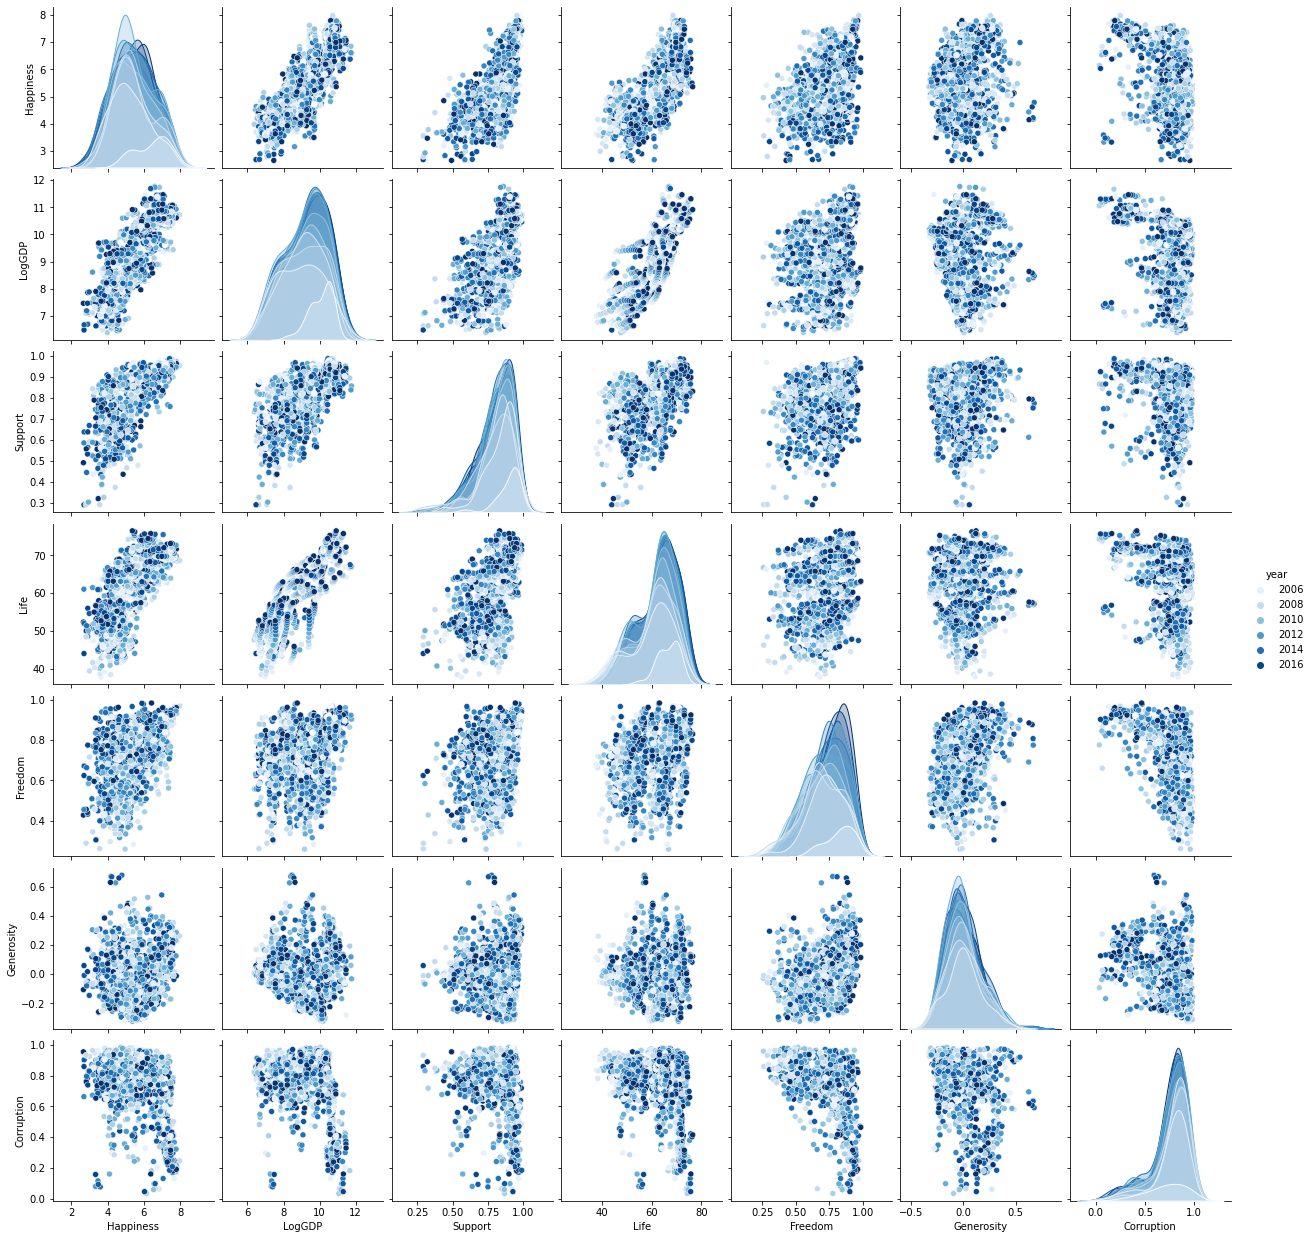

In [292]:
explanatory_vars = ['LogGDP','Support','Life','Freedom','Generosity','Corruption']
# the tricky part of this exercise was including 'year' in plot_vars eventhough it was not mentioned
# clearly in the question. we can not compute the variance of variable 'year', so, automatically will
# not bee seen on the grid, and it will be use only fo hue option
plot_vars = df[['Happiness','year'] + explanatory_vars]
sns.pairplot(plot_vars, hue= 'year',dropna=True, palette='Blues')



By inspecting the scatterplots above, we can see that some variables (such as LogGDP, Support, and Life) show some positive correlation with Happiness, whereas other variables show little correlation.  The Corruption data appears to show something of a negative correlation with Happiness.

To give a visual information about the data, we can use GeoPandas package to mape the countries on the globe, for a specific year. we might need to
*  !pip install geopandas
* do some renaming stuff on countries name, such as changing USA to United States, etc.


In [293]:
!pip install geopandas
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

country_names = {'Bosnia and Herz.': 'Bosnia and Herzegovina',
                    'Central African Rep.': 'Central African Republic',
                    'Congo': 'Congo (Brazzaville)',
                    'Dem. Rep. Congo': 'Congo (Kinshasa)',
                    'Czechia': 'Czech Republic',
                    "Côte d'Ivoire": 'Ivory Coast',
                    'Dominican Rep.': 'Dominican Republic',
                    'N. Cyprus': 'North Cyprus',
                    'Palestine': 'Palestinian Territories',
                    'Somaliland': 'Somaliland region',
                    'S. Sudan': 'South Sudan',
                    'eSwatini': 'Swaziland', 
                    'Taiwan': 'Taiwan Province of China',
                    'United States of America': 'United States'}

world = world.replace(to_replace=country_names)


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [294]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.00,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.00,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.00,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.00,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.00,North America,United States,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Because both the WHR dataframe and the world geodataframe contain columns listing country names, we can use those shared names to merge the two in order to produce a new geodataframe containing both the geography information and the WHR data

In [295]:
world_with_data = world.merge(df, left_on='name', right_on='country', how='outer')
world_with_data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
0,889953.00,Oceania,Fiji,FJI,5496.00,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58005463.00,Africa,Tanzania,TZA,63177.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2006.00,3.92,0.75,0.21,7.52,0.78,48.74,0.79,-0.03,0.65
2,58005463.00,Africa,Tanzania,TZA,63177.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2007.00,4.32,0.76,0.22,7.57,0.71,49.59,0.72,-0.02,0.71
3,58005463.00,Africa,Tanzania,TZA,63177.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2008.00,4.38,0.74,0.18,7.59,0.77,50.40,0.56,0.25,0.93
4,58005463.00,Africa,Tanzania,TZA,63177.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2009.00,3.41,0.78,0.16,7.62,0.84,51.16,0.61,0.30,0.90


### plotting Happines on GeoPandas:
We want to plot a Happiness map (chloropleth):
* First, drawing an outline of all the countries from the ```world``` dataframe as a base layer
* Next, plotting the Happiness data on top of the base layer

<AxesSubplot:>

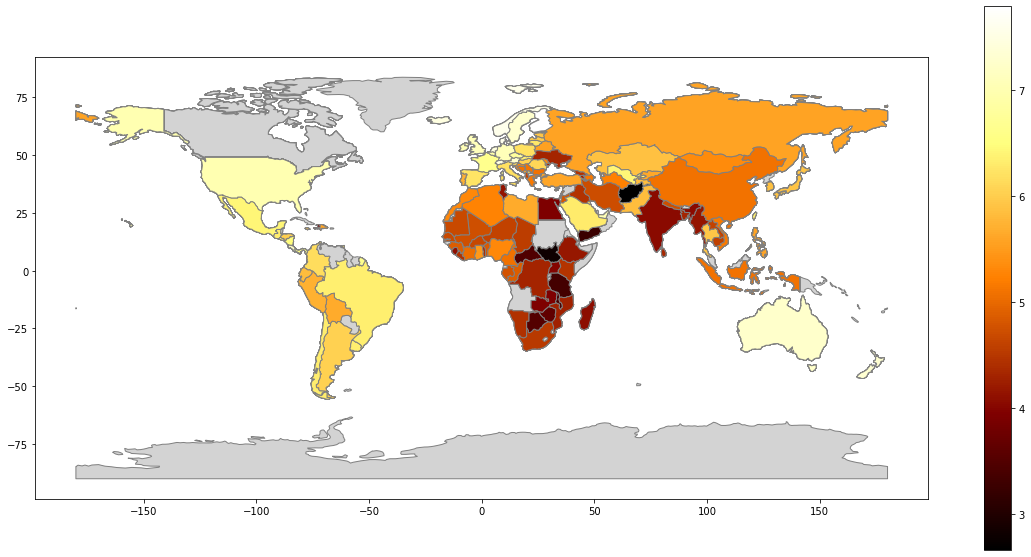

In [296]:
base = world_with_data.plot(color='lightgray', edgecolor='gray', figsize=(20,10))
world_with_data[world_with_data.year==2017].plot('Happiness', ax=base, cmap='afmhot', edgecolor='gray', legend=True)

We are going to get the correlation amin features between 2015-2018. We use ```corr()``` method in pandas

In [297]:
df1517 = df[df.year.isin(range(2015,2018))]
correlations = df1517.corr()
correlations

,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
year,1.00,0.03,-0.03,0.06,0.02,0.03,0.02,0.09,-0.07,-0.00
Happiness,0.03,1.00,0.54,-0.46,0.80,0.74,0.76,0.54,0.15,-0.44
Positive,-0.03,0.54,1.00,-0.43,0.33,0.46,0.31,0.62,0.29,-0.32
Negative,0.06,-0.46,-0.43,1.00,-0.41,-0.58,-0.44,-0.35,-0.09,0.34
LogGDP,0.02,0.80,0.33,-0.41,1.00,0.71,0.86,0.36,-0.02,-0.38
Support,0.03,0.74,0.46,-0.58,0.71,1.00,0.67,0.38,0.07,-0.25
Life,0.02,0.76,0.31,-0.44,0.86,0.67,1.00,0.33,0.01,-0.33
Freedom,0.09,0.54,0.62,-0.35,0.36,0.38,0.33,1.00,0.31,-0.49
Generosity,-0.07,0.15,0.29,-0.09,-0.02,0.07,0.01,0.31,1.00,-0.35
Corruption,-0.00,-0.44,-0.32,0.34,-0.38,-0.25,-0.33,-0.49,-0.35,1.00


Visualization of the correlation matrix is useful with a ```heatmap```

<AxesSubplot:>

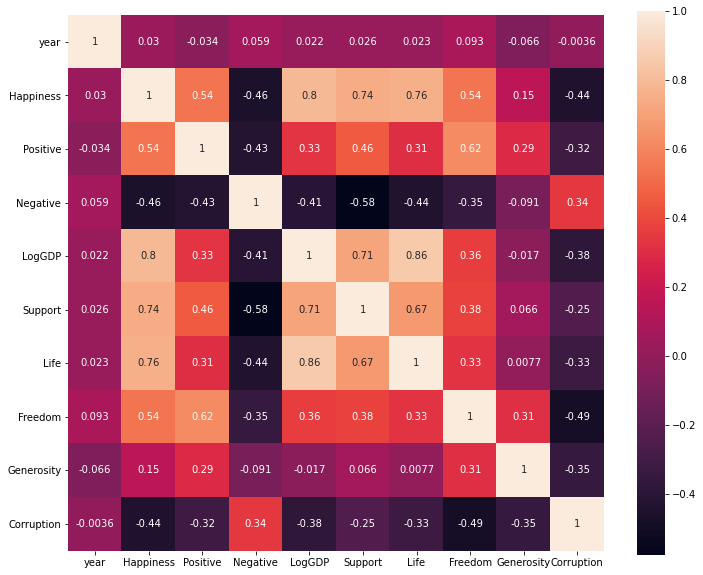

In [298]:
plt.figure(figsize=(12,10))
sns.heatmap(correlations, annot=True, square=True)

### information got from correlation heatmap:
the patterns of positive and negative correlation.  We noticed previously that LogGDP, Support, and Life all showed reasonably strong positive correlation with Happiness, and that Corruption showed negative correlation.  That is explicitly shown here.  And because we computed correlations over all columns of the dataframe, we also see information about the correlation of each variable with year.  The fact that no variable shows particularly strong correlation (positive or negative) with year indicates that the data are approximately constant over time

### plotting regression
we will use ```regplot``` method (short for regression plot) that both presents a scatterplot of a pair of variables and estimates a linear regression of the data.  


<AxesSubplot:xlabel='LogGDP', ylabel='Happiness'>

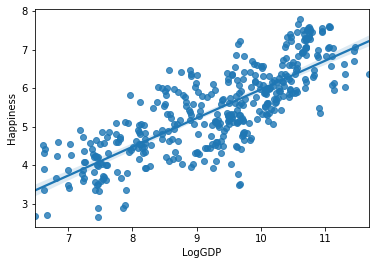

In [299]:
sns.regplot(x= "LogGDP", y= "Happiness" , data= df1517 )

 examine the relationship between 'Happiness' on the y-axis and 'Generosity' on the x-axis

<AxesSubplot:xlabel='Generosity', ylabel='Happiness'>

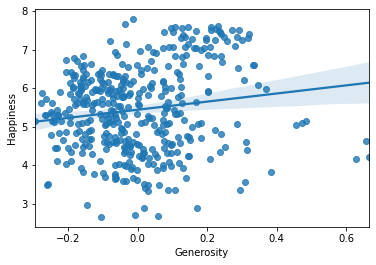

In [300]:
sns.regplot(x= "Generosity", y= "Happiness", data = df1517)

This is good information but still we need a lot more quantitative information

The World Happiness Report is generally interested in how self-reported Happiness (Life Ladder) is dependent on the variety of different factors that they measure (LogGDP, Support, Life, etc.).  The report carries out a detailed analysis explaining how much of each country's Happiness can be ascribed to each of the explanatory factors.

### Grouping together subsets of data via split-apply-combine
we will apply the split-apply-combine methodology to take advantage of substructure within the WHR panel data

In [301]:
#  The groupby method on a dataframe puts entries into groups that share a common label.
df.groupby(pd.cut(df.Happiness, bins=list(range(0,11)))).mean()
#  we use cut() method when we need to segment and sort data values into bins.

,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
Happiness,,,,,,,,,,
"(0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1, 2]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, 3]",2013.85,2.83,0.54,0.41,7.17,0.51,50.56,0.55,-0.01,0.83
"(3, 4]",2011.99,3.69,0.64,0.28,7.74,0.67,51.96,0.64,0.00,0.79
"(4, 5]",2011.61,4.55,0.66,0.28,8.37,0.75,56.95,0.67,-0.01,0.81
"(5, 6]",2011.87,5.48,0.69,0.26,9.39,0.83,63.82,0.71,-0.05,0.81
"(6, 7]",2012.09,6.46,0.78,0.25,10.15,0.89,67.90,0.79,0.00,0.73
"(7, 8]",2011.51,7.34,0.81,0.22,10.57,0.93,70.52,0.89,0.15,0.49
"(8, 9]",2005.00,8.02,0.86,0.15,10.70,0.97,68.11,0.97,NaN,0.24


The ```index``` represent ```Happiness bins```: from 0 to 1, 1 to 2, etc., on up to 9 to 10. These bins, or intervals, are regions defined by two endpoints: a lower value and an upper value.
* the interval labeled as (2, 3] refers to an interval where Happiness is greater than 2 and less than or equal to 3

We can also, ```group``` the WHR data into 10 bins in ```LogGDP```, and compute the total number of entries in each bin by applying the size method

In [302]:
LogGDP_bins = df.groupby((pd.cut(df.LogGDP, bins = 10))).size()
LogGDP_bins

LogGDP
(6.372, 6.917]       42
(6.917, 7.456]      100
(7.456, 7.995]      155
(7.995, 8.535]      159
(8.535, 9.074]      178
(9.074, 9.613]      245
(9.613, 10.152]     257
(10.152, 10.692]    257
(10.692, 11.231]    118
(11.231, 11.77]      24
dtype: int64

We can see what the distribution of LogGDP values produced by this cut looks like:

<AxesSubplot:xlabel='LogGDP'>

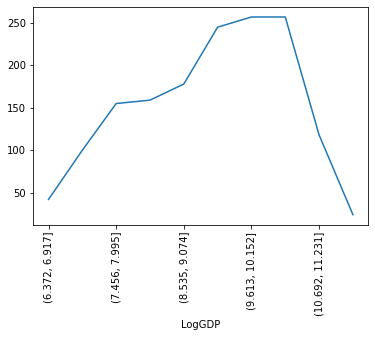

In [303]:
LogGDP_bins.plot(rot=90)

### We can use these grouping for the further higher level of analysis

In [304]:
# looking for correlation:
corr_matrix = df.corr()
corr_matrix['Happiness'].sort_values(ascending=False)

Happiness     1.00
LogGDP        0.78
Life          0.73
Support       0.70
Positive      0.55
Freedom       0.53
Generosity    0.20
year         -0.01
Negative     -0.27
Corruption   -0.43
Name: Happiness, dtype: float64

The most promissing attribute to predict the Happiness are the Log GDP, Life, Support. So we zoom in their correlation scatterplot

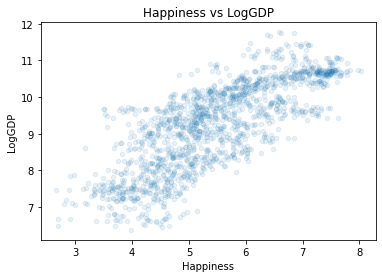

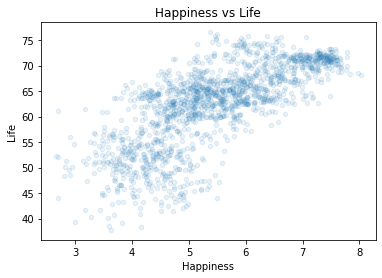

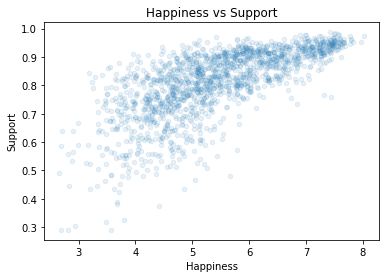

In [305]:
cor_items = ['LogGDP', 'Life', 'Support']
for item in cor_items:
    df.plot(kind="scatter", x='Happiness', y= item, alpha=0.1, title='Happiness vs '+item)

# Preparing data for ML Algorithms

### Data Cleaning

In [306]:
#  filling Nan values with medians,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1562 non-null   object 
 1   year        1562 non-null   int64  
 2   Happiness   1562 non-null   float64
 3   Positive    1544 non-null   float64
 4   Negative    1550 non-null   float64
 5   LogGDP      1535 non-null   float64
 6   Support     1549 non-null   float64
 7   Life        1553 non-null   float64
 8   Freedom     1533 non-null   float64
 9   Generosity  1482 non-null   float64
 10  Corruption  1472 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 134.4+ KB


### Another way to see number of missing values in each row

In [307]:
num_missing = df.isnull().sum(axis = 0)
num_missing

country        0
year           0
Happiness      0
Positive      18
Negative      12
LogGDP        27
Support       13
Life           9
Freedom       29
Generosity    80
Corruption    90
dtype: int64

### as we see, LogGDP, Support and Life that we are more intrested in, have some missing values

We have two options, using ```panda``` or ```SimpleImputer``` from sklearn.impute

In [308]:
# We could use SimpleImputer module, but we can do it simply by panda.
# TO implement with SimpleImputer, uncomment this part. create a SimpleImputer instance, specifying that you want to replace 
# each attribute’s missing values with the median
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='median')

# Note, this only works on numerical values, 
# if dataset has categorical values, we should make a coupy of numerical values and work on that copy
# df_num = df.drop("country",axis=1,inplace=True)
# df_num = df.drop("Happiness_cat",axis=1,inplace=True)
# #fit the imputer instance to the training data 
# imputer.fit(df)

In [309]:
# We use Pandas
df1 = df.fillna(df.mean(axis = 0))


In [311]:
# we shouldn't have any missing value
num_missing = df1.isnull().sum(axis = 0)
num_missing

country       0
year          0
Happiness     0
Positive      0
Negative      0
LogGDP        0
Support       0
Life          0
Freedom       0
Generosity    0
Corruption    0
dtype: int64

In [234]:
df1.head()

,country,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption,Happiness_cat
0,Afghanistan,2008,3.72,0.52,0.26,7.17,0.45,49.21,0.72,0.18,0.88,3
1,Afghanistan,2009,4.40,0.58,0.24,7.33,0.55,49.62,0.68,0.20,0.85,3
2,Afghanistan,2010,4.76,0.62,0.28,7.39,0.54,50.01,0.60,0.14,0.71,4
3,Afghanistan,2011,3.83,0.61,0.27,7.42,0.52,50.37,0.50,0.18,0.73,3
4,Afghanistan,2012,3.78,0.71,0.27,7.52,0.52,50.71,0.53,0.25,0.78,3


Ass we see all missing values are fixed in in the next cell

We have ```country``` name as a categorical value, we can turn it to numerical by. If so, uncomment and run the following code

In [313]:
# dfr_cat = df1[['country']]
# from sklearn.preprocessing import OneHotEncoder
# cat_encoder = OneHotEncoder()
# df1_cat_1hot = cat_encoder.fit_transform(dfr_cat)
# df1_cat_1hot
# # Notice that the output is a SciPy sparse matrix
# # if you really want to con‐vert it to a (dense) NumPy array, just call the toarray() method
# df1_cat_1hot.toarray()

 you can get the list of categories

In [246]:
cat_encoder.categories_

[array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
        'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
        'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
        'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
        'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
        'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
        'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
        'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
        'Guyana', 'Haiti', 'Honduras', 'Hong Kong S.A.R. of China',
        'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
        'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan',
        

### to get all attributes to have the same scale:
To scale our data we don't use StandardScaler because all our data is not normally distributed
We use MinMax because it works well with this situation and also we don't have any outlier.

In [281]:
df1.head()

,country,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
0,Afghanistan,2008,3.72,0.52,0.26,7.17,0.45,49.21,0.72,0.18,0.88
1,Afghanistan,2009,4.40,0.58,0.24,7.33,0.55,49.62,0.68,0.20,0.85
2,Afghanistan,2010,4.76,0.62,0.28,7.39,0.54,50.01,0.60,0.14,0.71
3,Afghanistan,2011,3.83,0.61,0.27,7.42,0.52,50.37,0.50,0.18,0.73
4,Afghanistan,2012,3.78,0.71,0.27,7.52,0.52,50.71,0.53,0.25,0.78


### Coding in progress

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
df2 = minmax_scaler.fit(df1)